Explanation of each columns:
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

Main Objective from this model is to **classified** fraud case from online transaction. Target Class is "isFraud" column, with Fraud labeled with 1 and not Fraud is labeled with 0

# Load Data

In [ ]:
import pandas as pd 
import numpy as np 

data = "onlinefraud.csv"
df = pd.read_csv(data)
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


"isFlaggedFraud" is from the dataset that is already cleaned and trained. So, we need to drop that

In [3]:
df_clean = df.copy()
df_clean = df_clean.drop(['isFlaggedFraud'], axis=1)
df_clean.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


# Explonatory Data Analysis

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [5]:
kolom = df_clean.columns

for col in kolom:
        print("col", df_clean[col].value_counts())
        print("\n")

col step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64


col type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


col amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
147631.41         1
239653.56         1
95994.69          1
373926.45         1
33313.71          1
Name: count, Length: 5316900, dtype: int64


col nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
              ..
C1970706589    1
C40604503      1
C1614818636    1
C2089752665    1
C154988899     1
Name: count, Length: 6353307, dtype: int64


col oldbalanceOrg
0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
53388

In [5]:
df_clean.duplicated().sum()

np.int64(0)

In [6]:
df_clean.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Because the dataset is clean, so there is no null and duplicate data

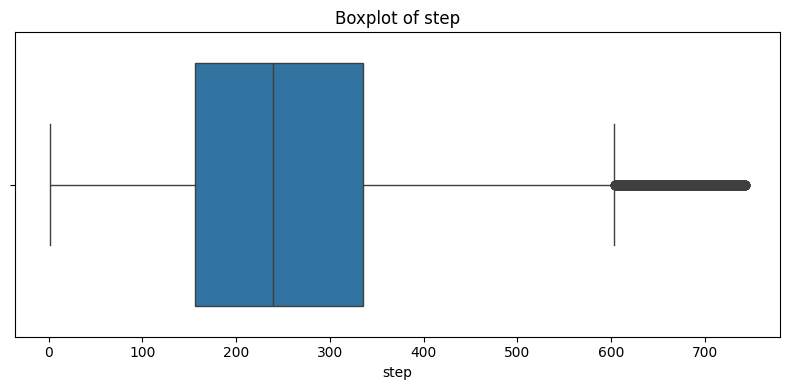

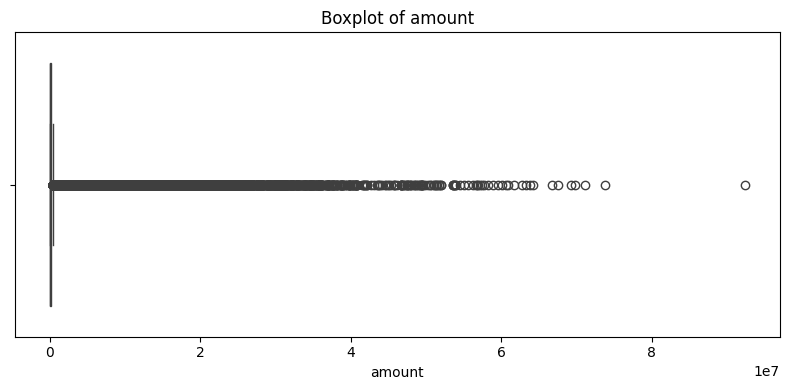

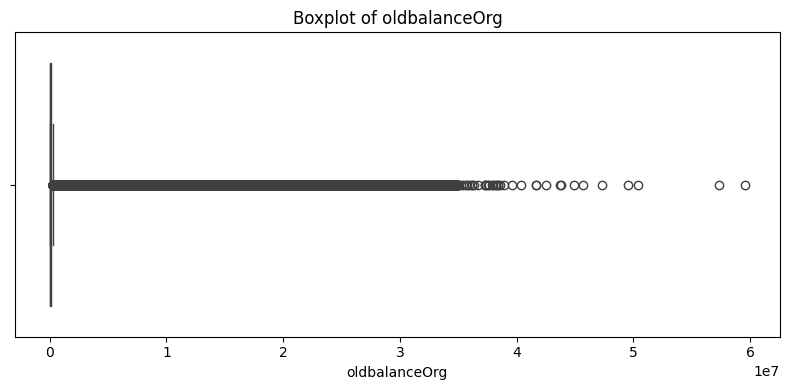

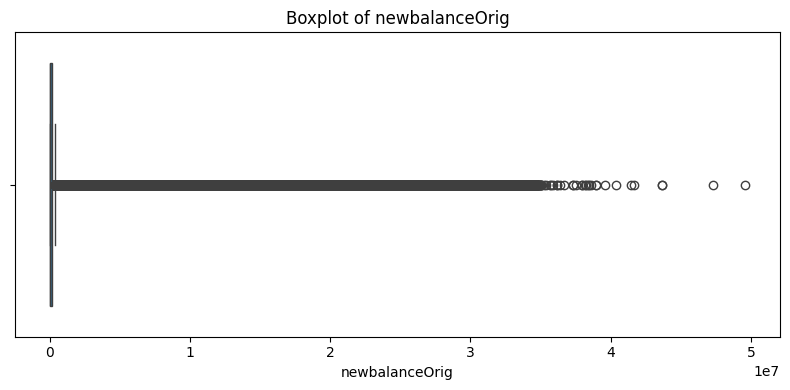

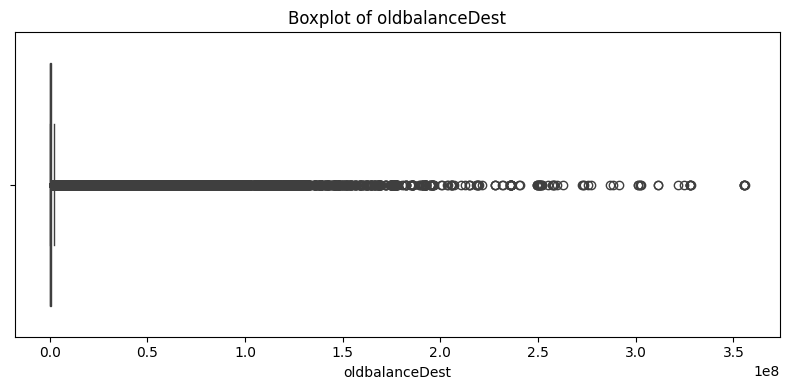

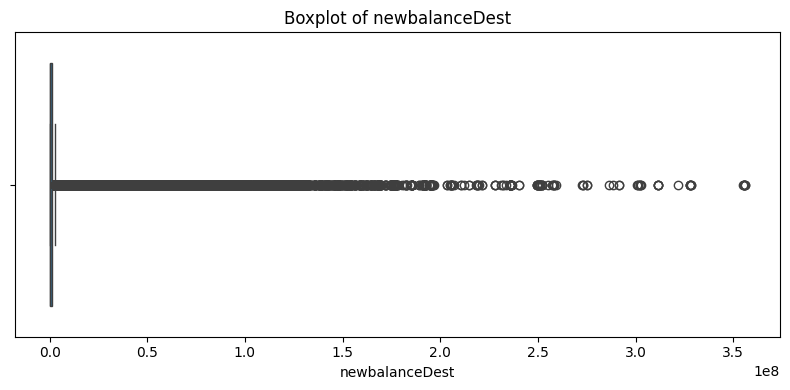

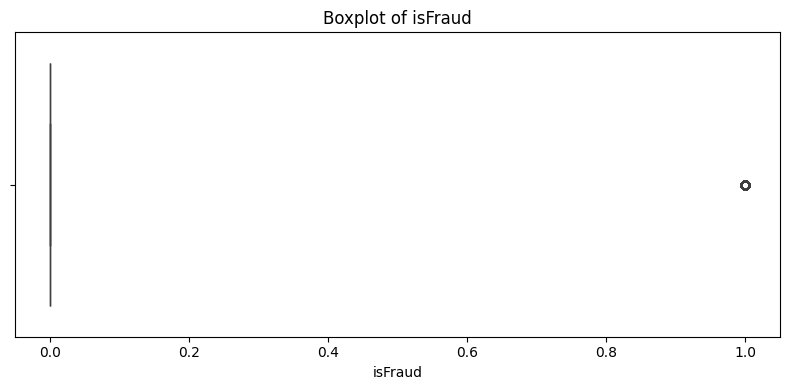

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop tiap kolom numerik
for col in df_clean.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


Outliers are temporarily not removed, because anomalous data can indicate possible fraud. In addition, we will also use a model that is not sensitive to outliers, Random Forest.

In [7]:
df_clean.groupby('type')['isFraud'].sum()

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

From the result above, we know that Cash_Out and Transfer type of transaction is responsible for fraud cases.

In [9]:
#encode type
df_clean['type_encoded'] = df['type'].replace({'CASH_IN': 1, 'CASH_OUT': 2, 'DEBIT':3, 'PAYMENT': 4, 'TRANSFER': 5})

C:\Users\User\AppData\Local\Temp\ipykernel_11288\1405388314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['type_encoded'] = df['type'].replace({'CASH_IN': 1, 'CASH_OUT': 2, 'DEBIT':3, 'PAYMENT': 4, 'TRANSFER': 5})


We encode the "type" column, so that we can see the correlation between it and other columns. Also, so that we can make our model learn better

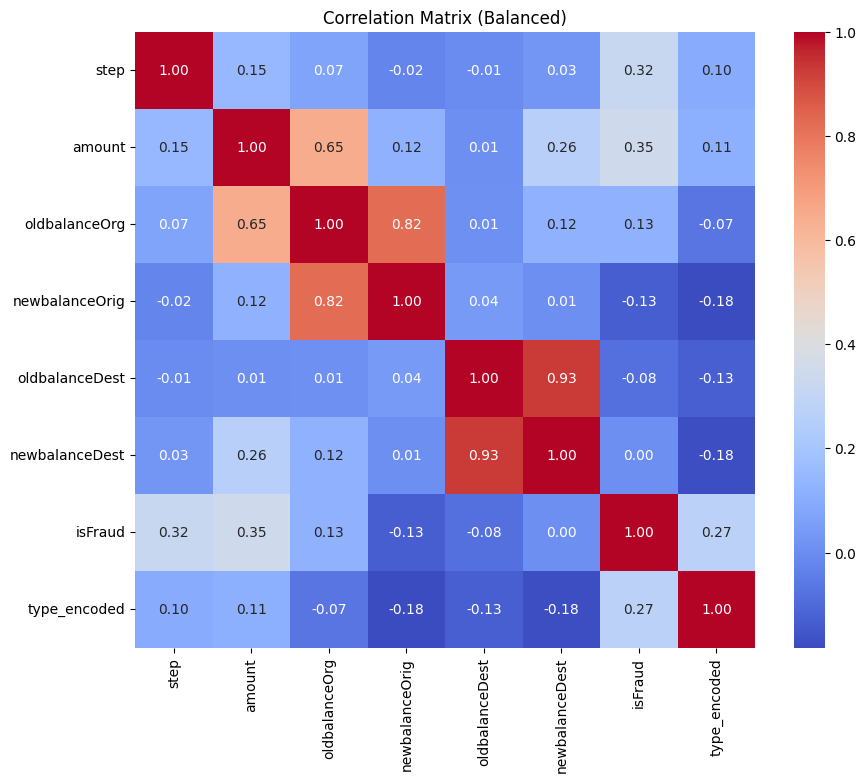

In [ ]:
#split fraud and non_fraud
fraud_data = df_clean[df_clean['isFraud'] == 1]
non_fraud_data = df_clean[df_clean['isFraud'] == 0]

#balancing the amount of fraud and non_fraud because they're imbalance
non_fraud_sample = non_fraud_data.sample(n=len(fraud_data), random_state=42)

#used balanced df to analyze correlation and train models to be unbiased towards the majority.
balanced_df = pd.concat([fraud_data, non_fraud_sample])
balanced_correlation = balanced_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(balanced_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Balanced)")
plt.show()

From pearson correlation above, we found that correlation between amount and isFraud is 0.35,  step and isFraud is 0.32, and type_encoded and isFraud is 0.27. So, we can conclude that there is no feature has a strong **linear correlation** with isFraud column.

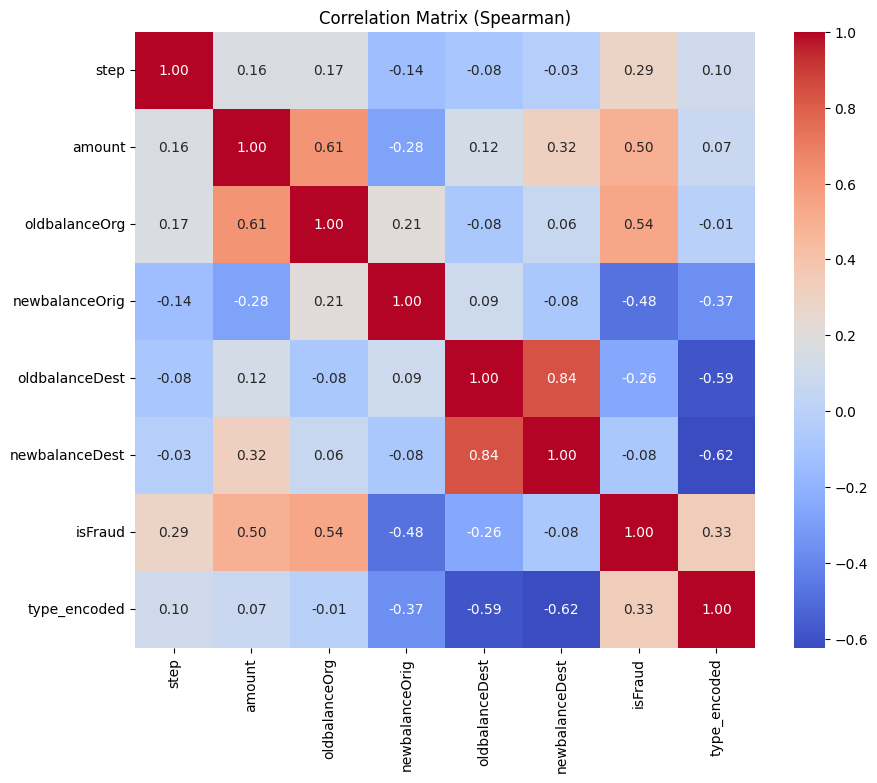

In [18]:
spearman_correlation = balanced_df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Spearman)")
plt.show()

However, the Spearman correlation shows that isFraud has moderate correlation with amount, oldbalanceOrg, and newbalanceOrg. This indicates a potential of **monotonic but non-linear** relationships between these features and isFraud column.

# Data Preparation

## Split Data

In [25]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(['type','isFraud','nameOrig','nameDest'], axis=1)
y = df_clean['isFraud']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

nameOrig and nameDest usulaly will make model overfit because there are too many unique values **(high cardinality)**. So we drop them.

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   type_encoded    int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

We use smote to handle imbalance dataset.

In [38]:
y_train_smote.value_counts()

isFraud
0    5083526
1    5083526
Name: count, dtype: int64

In [41]:
y_test.value_counts()

isFraud
0    1270881
1       1643
Name: count, dtype: int64

# Model Building

First, train baseline model with Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_light = RandomForestClassifier(
    n_estimators=50,     
    max_depth=10,           # limiting the depth of the tree
    n_jobs=-1,              # use all cpu
    random_state=42
)

rf_light.fit(X_train_smote, y_train_smote)

y_pred = rf_light.predict(X_test)


Accuracy : 98.55%
Precision: 0.0806
Recall   : 0.9860
F1 Score : 0.1490
MCC Score: 0.2798


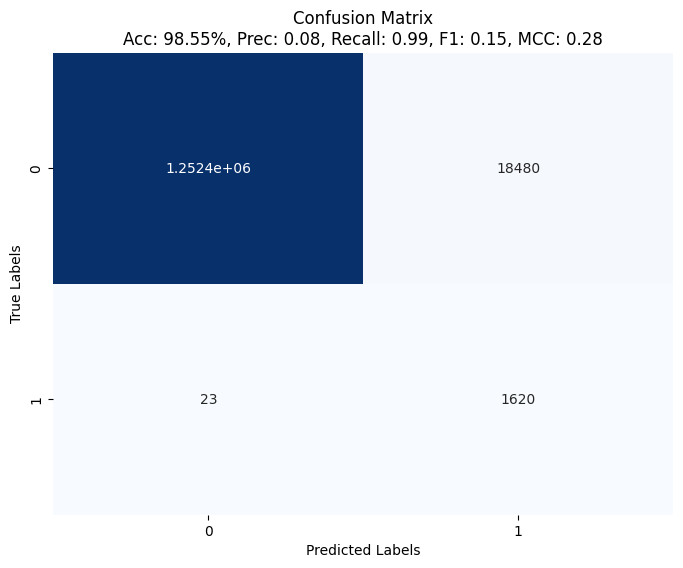

In [ ]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, matthews_corrcoef,
    precision_score, recall_score, f1_score
)

accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Accuracy : {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall   : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print(f'MCC Score: {mcc:.4f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title(
    f'Confusion Matrix\nAcc: {accuracy * 100:.2f}%, Prec: {precision:.2f}, '
    f'Recall: {recall:.2f}, F1: {f1:.2f}, MCC: {mcc:.2f}'
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


From evalution metrics above, it shows that our model have a very high accuracy and recall. But, F1, precision, and MCC score very low. So, our model can detect almost all fraud cases, but there are too many false classified fraud cases. For now, our model is not good enough for real-world case.

## Threshold Tuning
We can tune our prediction threshold. By default, model used 0.5 as its threshold. We can change it, for example with 0.7.

In [ ]:
from sklearn.metrics import classification_report
y_proba = rf_light.predict_proba(X_test)[:, 1]

custom_threshold = 0.7
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.18      0.97      0.30      1643

    accuracy                           0.99   1272524
   macro avg       0.59      0.98      0.65   1272524
weighted avg       1.00      0.99      1.00   1272524



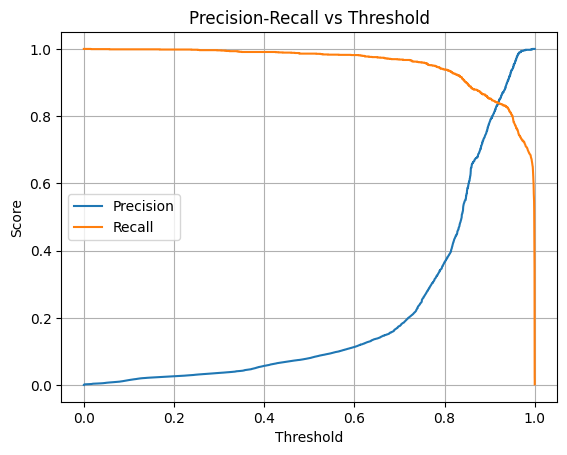

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()


Data plot above shows that over 0.85 threshold, precision spike up and recall spike down. We're gonna look for the best threshold from F1 Score.

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # hindari div 0

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold (F1 max): {best_threshold:.2f}")
print(f"Precision: {precision[best_idx]:.4f}")
print(f"Recall   : {recall[best_idx]:.4f}")
print(f"F1 Score : {f1_scores[best_idx]:.4f}")

Best Threshold (F1 max): 0.95
Precision: 0.9352
Recall   : 0.8077
F1 Score : 0.8668


From data above, we know that the best threshold is 0.95. We will train our model again using it.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.94      0.81      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.90      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



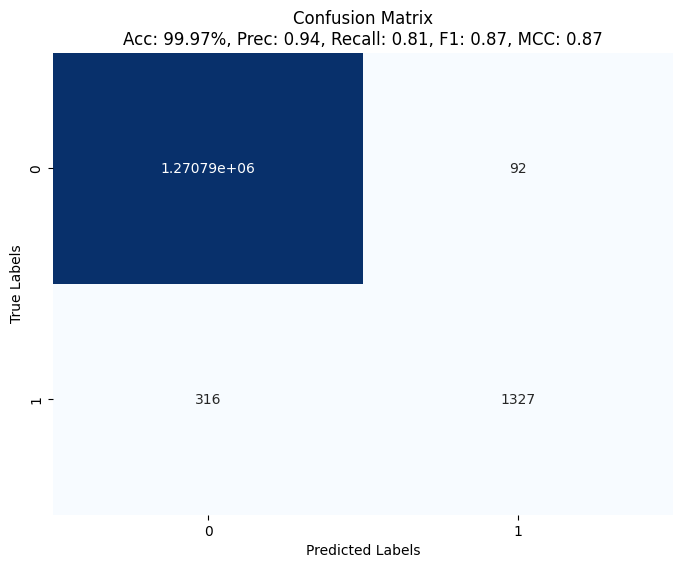

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix
)

# Prediction using optimal threshold
y_pred_opt = (y_proba >= best_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_opt)
precision = precision_score(y_test, y_pred_opt, zero_division=0)
recall = recall_score(y_test, y_pred_opt, zero_division=0)
f1 = f1_score(y_test, y_pred_opt, zero_division=0)
mcc = matthews_corrcoef(y_test, y_pred_opt)

print(classification_report(y_test, y_pred_opt))

conf_matrix = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title(
    f'Confusion Matrix\nAcc: {accuracy * 100:.2f}%, Prec: {precision:.2f}, '
    f'Recall: {recall:.2f}, F1: {f1:.2f}, MCC: {mcc:.2f}'
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Our new model now is more realistic for fraud cases. Although recall is lower than before, but F1, Precision score, and MCC is way better.

# Feature Importance

C:\Users\User\AppData\Local\Temp\ipykernel_18780\2333732204.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')


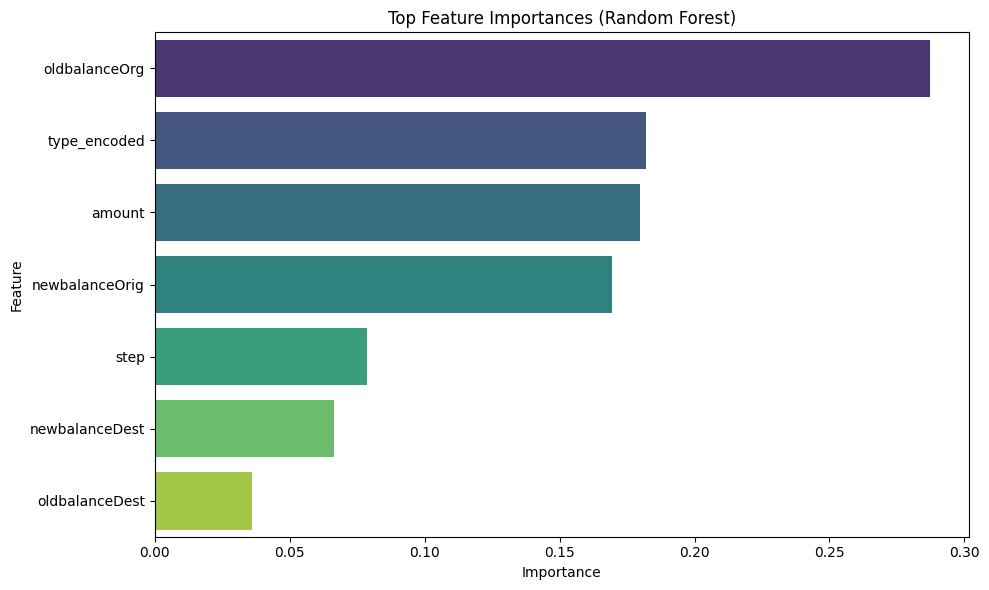

In [ ]:
importances = rf_light.feature_importances_
feature_names = X_train_smote.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title('Top Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()